In [5]:
import pickle
import pandas as pd
import numpy as np
import os

In [2]:
SUBJECTS_PATH='data/Subjects_ActionNet_EMG'
DATA_PATH='data/ActionNet_EMG'
TRAINVAL_PATH='train_val'

with open(os.path.join(DATA_PATH,'ActionNet_test_emg.pkl'), 'rb') as f:
    test = pd.read_pickle(f)
    
with open(os.path.join(DATA_PATH,'ActionNet_train_emg.pkl'), 'rb') as f:
    train = pd.read_pickle(f)

with open(os.path.join(SUBJECTS_PATH,'S04_1.pkl'), 'rb') as f:
    s04 = pd.read_pickle(f)
    
with open(os.path.join(DATA_PATH,'S04.pkl'), 'rb') as f:
    s04_rgb = pd.read_pickle(f)
    
with open(os.path.join(DATA_PATH,'ActionNet_kfold_multimodal.pkl'), 'rb') as f:
    s04_kfold = pd.read_pickle(f)
    
with open(os.path.join(DATA_PATH,'ActionNet_kfold_multimodal_filtered.pkl'), 'rb') as f:
    s04_kfold_filtered = pd.read_pickle(f)
    
with open(os.path.join(TRAINVAL_PATH,"ActionNet_test.pkl"), 'rb') as f:
    test_split = pd.read_pickle(f)
    
with open(os.path.join(TRAINVAL_PATH,"ActionNet_train.pkl"), 'rb') as f:
    train_split = pd.read_pickle(f)
    
""" with open(os.path.join(DATA_PATH,'ActionNet_train_emg_augmented.pkl'), 'rb') as f:
    aug_train = pd.read_pickle(f) 
    
with open(os.path.join(DATA_PATH,'ActionNet_test_emg_augmented.pkl'), 'rb') as f:
    aug_test = pd.read_pickle(f) """

NameError: name 'os' is not defined

In [3]:
def dataset_information(df, label='description'):
    if type(df)==str:
        with open(df, 'rb') as f:
            df = pd.read_pickle(f)
    print(df.head())  
    print("Columns: ", df.columns)
    print("Number of samples: ", len(df))
    print("Number of classes: ", len(df[label].unique()))
    classes = df[label].unique()
    classes.sort()
    print("Classes: ",classes)
    #print("Number of samples per class: ")
    #print(df['description'].value_counts())
    #print("Number of samples per subject: ")
    #print(df['subject'].value_counts())
      

In [6]:
dataset_information(os.path.join(DATA_PATH,'ActionNet_train_emg_filtered.pkl'))

                                          description              start  \
40                      Spread jelly on a bread slice  1657738827.446179   
10  Get/replace items from refrigerator/cabinets/d...  1655240527.616489   
6                                 Clear cutting board  1655227788.578162   
24                                Clear cutting board  1657738275.781072   
6                                    Slice a cucumber  1655240291.104034   

                 stop                                myo_left_timestamps  \
40  1657738849.388229  [1657738827.4506874, 1657738827.458187, 165773...   
10  1655240597.796199  [1655240527.6204886, 1655240527.624489, 165524...   
6   1655227803.030983  [1655227788.5796585, 1655227788.586136, 165522...   
24  1657738281.077074  [1657738275.7875714, 1657738275.795071, 165773...   
6   1655240339.637956  [1655240291.109043, 1655240291.1125388, 165524...   

                                    myo_left_readings  \
40  [[4, 12, 21, -21, 3, -2, 

In [6]:
dataset_information(os.path.join(DATA_PATH,'ActionNet_train_multimodal_filtered.pkl'))

Columns:  Index(['description', 'start', 'stop', 'myo_left_timestamps',
       'myo_left_readings', 'myo_right_timestamps', 'myo_right_readings',
       'Subject', 'label'],
      dtype='object')
Number of samples:  51
Number of classes:  19
Classes:  ['Clean a pan with a sponge' 'Clean a pan with a towel'
 'Clean a plate with a sponge' 'Clean a plate with a towel'
 'Clear cutting board'
 'Get items from cabinets: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Get/replace items from refrigerator/cabinets/drawers'
 'Load dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Open/close a jar of almond butter' 'Peel a cucumber' 'Peel a potato'
 'Pour water from a pitcher into a glass' 'Slice a cucumber'
 'Slice a potato' 'Slice bread' 'Spread almond butter on a bread slice'
 'Spread jelly on a bread slice'
 'Stack on table: 3 each large/small plates, bowls'
 'Unload dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensi

# Merged Dataset

In [86]:
dataset_information(os.path.join(DATA_PATH,"S04.pkl"), label='description')

Columns:  Index(['description', 'start', 'stop', 'myo_left_timestamps',
       'myo_left_readings', 'myo_right_timestamps', 'myo_right_readings'],
      dtype='object')
Number of samples:  60
Number of classes:  21
Classes:  ['Clean a pan with a sponge' 'Clean a pan with a towel'
 'Clean a plate with a sponge' 'Clean a plate with a towel'
 'Clear cutting board'
 'Get items from cabinets: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Get/replace items from refrigerator/cabinets/drawers'
 'Load dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Open/close a jar of almond butter' 'Peel a cucumber' 'Peel a potato'
 'Pour water from a pitcher into a glass'
 'Set table: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Slice a cucumber' 'Slice a potato' 'Slice bread'
 'Spread almond butter on a bread slice' 'Spread jelly on a bread slice'
 'Stack on table: 3 each large/small plates, bowls'
 'Unload dishwasher: 3 each lar

In [87]:
dataset_information(os.path.join(DATA_PATH,"ActionNet_test_S04.pkl"), label='description')

Columns:  Index(['description', 'start', 'stop', 'myo_left_timestamps',
       'myo_left_readings', 'myo_right_timestamps', 'myo_right_readings',
       'Subject'],
      dtype='object')
Number of samples:  8
Number of classes:  7
Classes:  ['Clean a pan with a towel' 'Clean a plate with a towel'
 'Clear cutting board' 'Open/close a jar of almond butter'
 'Pour water from a pitcher into a glass'
 'Set table: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Spread almond butter on a bread slice']


In [74]:
dataset_information(train_split, label='description')

Number of samples:  527
Number of classes:  22
Classes:  ['Clean a pan with a sponge' 'Clean a pan with a towel'
 'Clean a plate with a sponge' 'Clean a plate with a towel'
 'Clear cutting board'
 'Get items from cabinets: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Get items from refrigerator/cabinets/drawers'
 'Get/replace items from refrigerator/cabinets/drawers'
 'Load dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Open a jar of almond butter' 'Open/close a jar of almond butter'
 'Peel a cucumber' 'Peel a potato'
 'Pour water from a pitcher into a glass'
 'Set table: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Slice a cucumber' 'Slice a potato' 'Slice bread'
 'Spread almond butter on a bread slice' 'Spread jelly on a bread slice'
 'Stack on table: 3 each large/small plates, bowls'
 'Unload dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils']
    index       file           

In [73]:
dataset_information(test_split, label="description")

Number of samples:  59
Number of classes:  20
Classes:  ['Clean a pan with a towel' 'Clean a plate with a sponge'
 'Clean a plate with a towel' 'Clear cutting board'
 'Get items from cabinets: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Get items from refrigerator/cabinets/drawers'
 'Get/replace items from refrigerator/cabinets/drawers'
 'Load dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Open/close a jar of almond butter' 'Peel a cucumber' 'Peel a potato'
 'Pour water from a pitcher into a glass'
 'Set table: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Slice a cucumber' 'Slice a potato' 'Slice bread'
 'Spread almond butter on a bread slice' 'Spread jelly on a bread slice'
 'Stack on table: 3 each large/small plates, bowls'
 'Unload dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils']
    index       file                                       description  \
4       4  S02_2.p

In [63]:
dataset_information(train)

Number of samples:  527
Number of classes:  22
Classes:  ['Spread jelly on a bread slice'
 'Get/replace items from refrigerator/cabinets/drawers'
 'Clear cutting board' 'Slice a cucumber' 'Clean a pan with a sponge'
 'Clean a pan with a towel' 'Get items from refrigerator/cabinets/drawers'
 'Slice a potato' 'Pour water from a pitcher into a glass'
 'Spread almond butter on a bread slice'
 'Load dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Slice bread' 'Clean a plate with a sponge' 'Peel a cucumber'
 'Clean a plate with a towel' 'Open a jar of almond butter'
 'Peel a potato' 'Open/close a jar of almond butter'
 'Set table: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Stack on table: 3 each large/small plates, bowls'
 'Get items from cabinets: 3 each large/small plates, bowls, mugs, glasses, sets of utensils'
 'Unload dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils']
                                

# Augmented Dataset

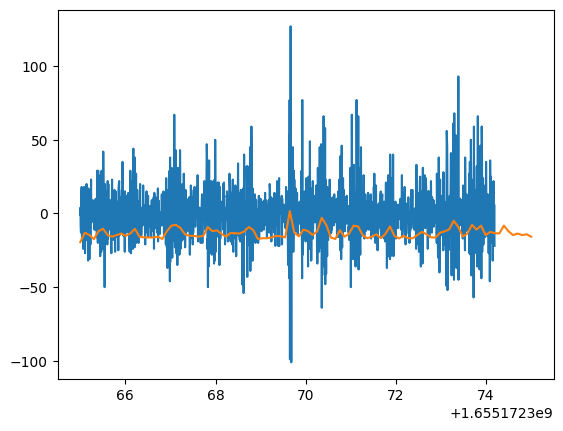

In [53]:
import matplotlib.pyplot as plt
num=100
plt.plot(test["myo_left_timestamps"].iloc[0][0:num*15], test["myo_left_readings"].iloc[0][:,0][0:num*15])
plt.plot(aug_test["myo_left_timestamps"].iloc[0][0:num], aug_test["myo_left_readings"].iloc[0][:,0][0:num]*20)